In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import GPy

In [2]:
os.chdir('/home/saumya/Documents/Spect_data/Temp_uniform_Mol_uniform/')

In [3]:
x_dat = np.load('abs.npy').astype(np.half)
# x_dat = np.reshape(x_dat, -1)[:, None]

In [4]:
x_dat.shape

(10000, 3000)

In [5]:
y_dat_temp = np.load('temp.npy')

y_dat_temp = np.reshape(y_dat_temp, -1)[:, None]

In [6]:
y_dat_temp.shape

(10000, 1)

In [7]:
y_dat_conc = np.load('conc.npy')

y_dat_conc = np.reshape(y_dat_conc, -1)[:, None]

In [8]:
y_dat_conc.shape

(10000, 1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
def train_val_test_split(X, y, val_size):
    # test_size = 1 - train_size - val_size
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = val_size)
    # relative_train_size = train_size / (val_size + train_size)
    # X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                    #   train_size = relative_train_size, test_size = 1-relative_train_size)
    return X_train_val, X_test, y_train_val.T, y_test

In [11]:
# y_dat = [i for i in zip(y_dat_temp, y_dat_conc)]
y_dat = np.hstack((y_dat_temp, y_dat_conc))
# y_dat = y_dat.T

In [12]:
X_train, X_test, Y_train, Y_test = train_val_test_split(x_dat, y_dat, .2)

In [13]:
# Y_train.shape

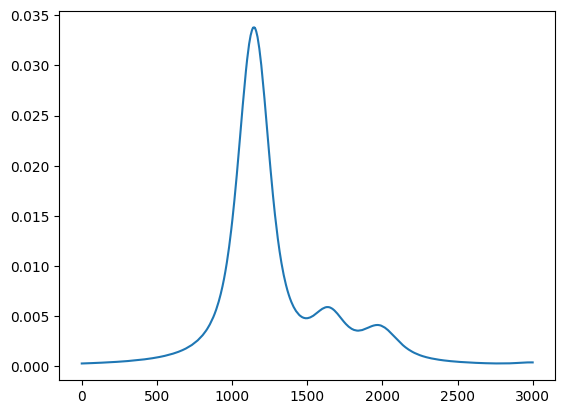

In [14]:
plt.plot(x_dat[50])

In [15]:
np.shape(X_train)[1]

3000

In [16]:
# ICM model set up
ks = GPy.kern.RBF(np.shape(X_train)[1])
icm = GPy.util.multioutput.ICM(input_dim=np.shape(X_train)[1],num_outputs=2,kernel=ks)

In [17]:
print(icm)
print('W matrix\n',icm.B.W)
print('\nkappa vector\n',icm.B.kappa)
print('\nB matrix\n',icm.B.B)

  ICM.             |   value  |  constraints  |  priors
  rbf.variance     |     1.0  |      +ve      |        
  rbf.lengthscale  |     1.0  |      +ve      |        
  B.W              |  (2, 1)  |               |        
  B.kappa          |    (2,)  |      +ve      |        
W matrix
   index  |     ICM.B.W  |  constraints  |  priors
  [0 0]  |  0.63753835  |               |        
  [1 0]  |  0.40381291  |               |        

kappa vector
   index  |  ICM.B.kappa  |  constraints  |  priors
  [0]    |   0.50000000  |      +ve      |        
  [1]    |   0.50000000  |      +ve      |        

B matrix
 [[0.90645514 0.25744621]
 [0.25744621 0.66306486]]


In [18]:
np.array([Y_train[0], Y_train[1]]).shape

(2, 8000)

In [19]:
Temp = np.array(Y_train[0])

Temp = np.reshape(Temp, -1)[:, None]

In [20]:
Conc = np.array(Y_train[1])

Conc = np.reshape(Conc, -1)[:, None]

In [39]:
Conc[0]

array([0.18888889])

In [21]:
Temp.shape

(8000, 1)

In [22]:
Y_trainK = np.reshape(Y_train, -1)[:, None]

In [23]:
m = GPy.models.GPCoregionalizedRegression([X_train, X_train],[Temp, Conc],kernel=icm)
m['.*rbf.var'].constrain_fixed(1.)
# constrain if converge to reasonless extrema
# m['mixed_noise.Gaussian_noise_0.variance'].constrain_bounded(0,1e-5)
# m['mixed_noise.Gaussian_noise_1.variance'].constrain_bounded(0,1e-5)
# m['mixed_noise.Gaussian_noise_2.variance'].constrain_bounded(0,1e-5)
print(m)


Name : gp
Objective : 67364752.9794926
Number of Parameters : 8
Number of Optimization Parameters : 7
Updates : True
Parameters:
  gp.                                    |   value  |  constraints  |  priors
  ICM.rbf.variance                       |     1.0  |   +ve fixed   |        
  ICM.rbf.lengthscale                    |     1.0  |      +ve      |        
  ICM.B.W                                |  (2, 1)  |               |        
  ICM.B.kappa                            |    (2,)  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |     1.0  |      +ve      |        
  mixed_noise.Gaussian_noise_1.variance  |     1.0  |      +ve      |        


In [24]:
print('W matrix\n',icm.B.W)
print('\nkappa vector\n',icm.B.kappa)

W matrix
   index  |  gp.ICM.B.W  |  constraints  |  priors
  [0 0]  |  0.63753835  |               |        
  [1 0]  |  0.40381291  |               |        

kappa vector
   index  |  gp.ICM.B.kappa  |  constraints  |  priors
  [0]    |      0.50000000  |      +ve      |        
  [1]    |      0.50000000  |      +ve      |        


In [25]:
m.optimize()

In [26]:
print(m)
print('W matrix\n',icm.B.W)
print('\nkappa vector\n',icm.B.kappa)
print('\nB matrix\n',icm.B.B)


Name : gp
Objective : -57618.0243150796
Number of Parameters : 8
Number of Optimization Parameters : 7
Updates : True
Parameters:
  gp.                                    |                   value  |  constraints  |  priors
  ICM.rbf.variance                       |                     1.0  |   +ve fixed   |        
  ICM.rbf.lengthscale                    |     0.14999699681081508  |      +ve      |        
  ICM.B.W                                |                  (2, 1)  |               |        
  ICM.B.kappa                            |                    (2,)  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |     0.10353130915191731  |      +ve      |        
  mixed_noise.Gaussian_noise_1.variance  |  1.953309366265346e-118  |      +ve      |        
W matrix
   index  |  gp.ICM.B.W  |  constraints  |  priors
  [0 0]  |  487.35022605  |               |        
  [1 0]  |  0.16374530  |               |        

kappa vector
   index  |  gp.ICM.B.kappa  |  con

In [27]:
import pickle
with open('save.pkl', 'wb') as file:
    pickle.dump(m, file)

In [28]:
# with open('save.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

In [29]:
newX = X_test

In [30]:
newX = np.concatenate((newX,np.zeros((np.shape(X_test)[0],1))),1)
noise_dict = {'output_index':newX[:,-1].astype(int)}
ys,var=m.predict(newX,Y_metadata=noise_dict)

# Temper_test_=scalerT.inverse_transform(ys)


In [31]:
ys

array([[1565.44085034],
       [2119.27049571],
       [1577.28233944],
       ...,
       [1817.28580541],
       [1745.63280681],
       [1556.53266922]])

In [32]:
from sklearn import metrics

In [33]:
conc_1 = metrics.mean_squared_log_error(np.array(ys), np.array(Y_test[:, 0]))
conc_1

3.957875515328089e-08

In [41]:
conc_1 = metrics.mean_squared_error(np.array(ys), np.array(Y_test[:,0]))
print(f'The mean squared error between the real and predicted values are: {conc_1}')

The mean squared error between the real and predicted values are: 0.12990313886638002


In [42]:
newX = X_test
newX = np.concatenate((newX,np.ones((np.shape(X_test)[0],1))),1)
noise_dict = {'output_index':newX[:,-1].astype(int)}
ys_d,var=m.predict(newX,Y_metadata=noise_dict)


In [43]:
conc_1 = metrics.mean_squared_log_error(np.array(ys_d), np.array(Y_test[:, 1]))
conc_1

1.5787522970010297e-09

In [46]:
conc_1 = metrics.mean_squared_error(np.array(ys_d), np.array(Y_test[:,1]))
print(f'The mean squared error between the real and predicted values are: {conc_1}')

The mean squared error between the real and predicted values are: 2.251607249876663e-09
